In [ ]:
from pandas import read_csv #use pandas to load the csv dataset
from google.colab import files
uploaded = files.upload()

Saving Energy Meter.csv to Energy Meter.csv


In [ ]:
filename="Energy Meter.csv"
names=['Voltage','Current','Power','Class']
dataset=read_csv(filename,names=names)

**DATA SHAPING**

In [ ]:
print(dataset.shape) #gives the number of cols and rows(rows,cols)
print(dataset.head(20))#gives the first 20 rows and cols
print(dataset.describe())#gives mean,count,std,mean etc
print(dataset.groupby('Class').size())

(400, 4)
    Voltage  Current  Power   Class
0    0.0000      0.0    0.0  NoLoad
1    0.0000      0.0    0.0  NoLoad
2    0.0000      0.0    0.0  NoLoad
3    0.0000      0.0    0.0  NoLoad
4    0.0000      0.0    0.0  NoLoad
5    0.0000      0.0    0.0  NoLoad
6    0.0000      0.0    0.0  NoLoad
7    0.3833      0.0    0.0  NoLoad
8    0.0000      0.0    0.0  NoLoad
9    0.0000      0.0    0.0  NoLoad
10   0.0000      0.0    0.0  NoLoad
11   0.0000      0.0    0.0  NoLoad
12   0.0000      0.0    0.0  NoLoad
13   0.0000      0.0    0.0  NoLoad
14   0.0000      0.0    0.0  NoLoad
15   0.0000      0.0    0.0  NoLoad
16   0.0000      0.0    0.0  NoLoad
17   0.0000      0.0    0.0  NoLoad
18   0.0000      0.0    0.0  NoLoad
19   0.0000      0.0    0.0  NoLoad
          Voltage     Current       Power
count  400.000000  400.000000  400.000000
mean   160.657320    0.317734   68.065053
std     93.125536    0.320430   68.941682
min      0.000000    0.000000    0.000000
25%     79.151450    0.07

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

**DATA VISUALISATION**

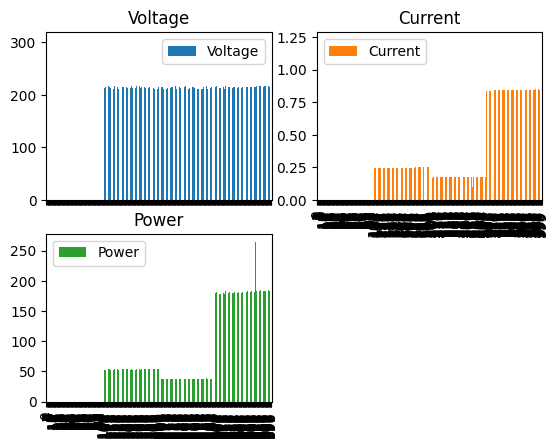

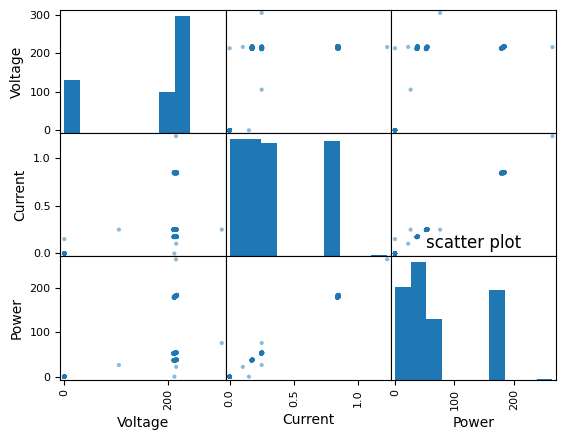

In [ ]:
dataset.plot(kind='bar',subplots=True,layout=(2,2))#layout means two graphs per col and per row, and subplot means every class will have a bar plot
pyplot.title("bar plot")
pyplot.show()

scatter_matrix(dataset)
pyplot.title("scatter plot")
pyplot.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

**DATA TRAINING**

In [ ]:
array=dataset.values
x=array[:,0:3]
y=array[:,3]
X_train,X_validation,y_train,y_validation=train_test_split(x,y,test_size=0.20,random_state=1) #80% traina dn 20% test and random stte corresponds to any value picked up at random

In [ ]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('KART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

**DATA VALIDATION**

LR:0.996875
LDA:0.996875
KNN:0.993750
KART:0.996875
NB:0.990625
SVM:0.990625


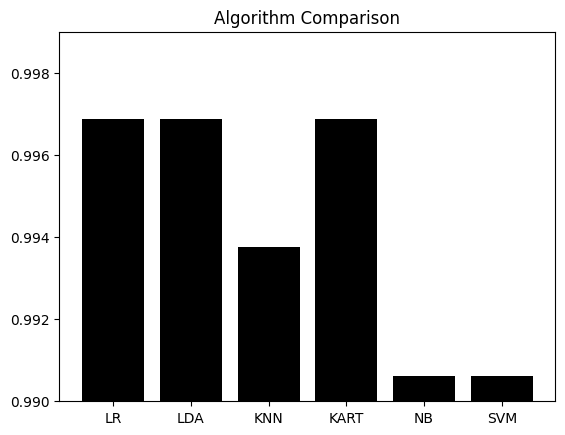

In [ ]:
results=[]
names=[]
res=[]
for name,model in models:
  kfold=StratifiedKFold(n_splits=10,random_state=None)
  cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  print('%s:%f'%(name,cv_results.mean()))

pyplot.ylim(.990,.999)
pyplot.bar(names,res,color='black')
pyplot.title('Algorithm Comparison')
pyplot.show()#TO SHOW WHICH WAY OF DATA TRAINING GIVES THE BEST ANSWERS FOR THE GIVEN SET POF DATA